# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#check_GPU = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#check_GPU
#torch.cuda.get_device_name(-1)
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")
print(device)

cpu


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="/home/deeplearning/Desktop/RL/deep-reinforcement-learning/p3_collab_competition/Tennis_Linux/Tennis.x86_64") ## _NoVis    #Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 4. Training

In [6]:
# agent = Agent(state_size, action_size, num_agents=num_agents, random_seed=0)


# def ddpg(n_episodes=10000, max_t=1000, print_every=100, train=True):
#     scores_window = deque(maxlen=100)
#     scores = []
    
#     for i_episode in range(1, n_episodes+1):
#         env_info = env.reset(train_mode=True)[brain_name]   
#         num_agents = len(env_info.agents)
#         states = env_info.vector_observations
#         scores_t = np.zeros(num_agents)
#         agent.reset()
        
#         for t in range(max_t):            
#             #actions = agent.act(states if train else np.zeros(states.size()))
#             actions = agent.act(states, i_episode)
#             env_info = env.step(actions)[brain_name]            
#             next_states = env_info.vector_observations
#             rewards = env_info.rewards
#             dones = env_info.local_done
            
#             if train:
#                 agent.step(states, actions, rewards, next_states, dones, t)
#                 states = next_states
#                 scores_t += np.array(rewards)
#             if np.any(dones):
#                 break
        
#         score = np.mean(scores_t)   
#         scores_window.append(score)
#         avg_score = np.mean(scores_window)
#         scores.append(score)
     

#         print('\rEpisode {}\tAverage Score: {:.2f}\tMean current: {:.2f}'.format(i_episode, avg_score, score), end="")
#         torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#         torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
#         if i_episode % 10 == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
#         if avg_score >= 0.8:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
#             torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#             torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
#             #break
#     return scores

In [7]:
agentLeft = Agent(state_size*2, action_size, num_agents=1, random_seed=0)
agentRight = Agent(state_size*2, action_size, num_agents=1, random_seed=0)

agentLeft.actor_local.load_state_dict(torch.load('./Models_bkp/checkpoint_actorleft.pth'))
agentLeft.critic_local.load_state_dict(torch.load('./Models_bkp/checkpoint_criticleft.pth'))

agentLeft.actor_target.load_state_dict(torch.load('./Models_bkp/checkpoint_actorleft.pth'))
agentLeft.critic_target.load_state_dict(torch.load('./Models_bkp/checkpoint_criticleft.pth'))


agentRight.actor_local.load_state_dict(torch.load('./Models_bkp/checkpoint_actorright.pth'))
agentRight.critic_local.load_state_dict(torch.load('./Models_bkp/checkpoint_criticright.pth'))

agentRight.actor_target.load_state_dict(torch.load('./Models_bkp/checkpoint_actorright.pth'))
agentRight.critic_target.load_state_dict(torch.load('./Models_bkp/checkpoint_criticright.pth'))



def ddpg(n_episodes=5000, max_t=2000, print_every=100, train=True):
    scores_window = deque(maxlen=100)
    scores_t_window = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   
        num_agents = 2 #len(env_info.agents)
        states = env_info.vector_observations
        states = np.reshape(states, (1, 48)) #sam
        
        scores_t = np.zeros(num_agents)
        agentLeft.reset()
        agentRight.reset()
        
        for t in range(max_t):            
            #actions = agent.act(states if train else np.zeros(states.size()))
            actionsLeft = agentLeft.act(states, i_episode)#[0] #sam
            #print(actionsLeft.shape , actionsLeft)
            actionsRight = agentRight.act(states, i_episode)#[1] #sam
            #print(actionsRight.shape , actionsRight)

            #actions  = np.concatenate((actionsLeft, actionsRight) , axis=0) #np.array(actionsLeft, actionsLeft)
            actions  = np.vstack((actionsLeft, actionsRight))
            #print(actions.shape , actions)
            
            env_info = env.step(actions)[brain_name]            
            next_states = env_info.vector_observations
            next_states = np.reshape(next_states, (1, 48)) #sam
            rewards = env_info.rewards
            dones = env_info.local_done
            
            #Sending (S, A, R, S) info to DDPG training agent for replay buffer and Neural network updates
            if train:
                agentLeft.step(states, actions[0], rewards[0], next_states, dones[0], t)
                agentRight.step(states, actions[1], rewards[1], next_states, dones[1], t)
                states = next_states
                scores_t += np.array(rewards)  #scores_t 
#                 if rewards != [0.0, 0.0]:
#                     print("Rewards",rewards )
            if np.any(dones):
                break
        
        score = np.max(scores_t)  #score = np.mean(scores_t)
        scores_window.append(score)
        scores_t_window.append(scores_t)
        avg_score = np.mean(scores_window)
        scores.append(score)
        max_score = np.max(scores)
     

        print('\rEpisode {}\tAverage Score: {:.2f}\tMean current: {:.2f}\tMax current: {:.2f}'.format(i_episode, avg_score, score, max_score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverageScoreS: {:.2f}'.format(i_episode, avg_score))
            torch.save(agentLeft.actor_local.state_dict(), './Models/checkpoint_actorleft.pth')
            torch.save(agentRight.actor_local.state_dict(), './Models/checkpoint_actorright.pth')

            torch.save(agentLeft.critic_local.state_dict(), './Models/checkpoint_criticleft.pth')
            torch.save(agentRight.critic_local.state_dict(), './Models/checkpoint_criticright.pth')
            
        if len(scores) >= 100 and i_episode % 100 == 0:
            #summary += f', Score: {score:.2f}'
            scores_filename = "./data/Scores_2Agent_BothState" +str(i_episode) + ".csv"
            np.savetxt(scores_filename, scores_window,  delimiter=",")          
        if avg_score >= 0.8:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            torch.save(agentLeft.actor_local.state_dict(), 'checkpoint_actorleft_best.pth')
            torch.save(agentRight.actor_local.state_dict(), 'checkpoint_actorright_best.pth')

            torch.save(agentLeft.critic_local.state_dict(), 'checkpoint_criticleft_best.pth')
            torch.save(agentRight.critic_local.state_dict(), 'checkpoint_criticright_best.pth')
            break
    return scores

In [8]:
scores = ddpg()

Episode 100	AverageScoreS: 0.07	Mean current: 0.09	Max current: 0.10
Episode 200	AverageScoreS: 0.08	Mean current: 0.10	Max current: 0.20
Episode 300	AverageScoreS: 0.09	Mean current: 0.10	Max current: 0.20
Episode 400	AverageScoreS: 0.07	Mean current: 0.10	Max current: 0.20
Episode 500	AverageScoreS: 0.08	Mean current: 0.00	Max current: 0.20
Episode 600	AverageScoreS: 0.11	Mean current: 0.30	Max current: 0.40
Episode 700	AverageScoreS: 0.16	Mean current: 0.20	Max current: 0.60
Episode 800	AverageScoreS: 0.23	Mean current: 0.10	Max current: 0.90
Episode 900	AverageScoreS: 0.29	Mean current: 2.60	Max current: 2.60
Episode 987	Average Score: 0.80	Mean current: 1.50	Max current: 2.60
Environment solved in 987 episodes!	Average Score: 0.80


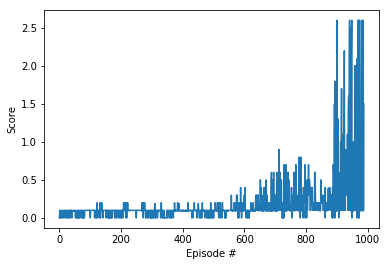

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
plt.savefig('Average_score_over100_episodes_p3_v1.png')


In [10]:
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)n_
# n_episodes = 1000
# for i_episode in range(1, n_episodes+1):
#     actions = agent.act(states, i_episode)                        # select an action (for each agent)
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [11]:
env.close()